#### Feature attribution
With running this code, you can retrieve the heatmap and word clouds to be pasted in the Feature attribution Figma Prototype. It can be used generate parts of version 1, as well as version 2 of the prototypes.

##### Required Input: Python list of string tokens and np array of normalized lime of same length
##### Example:

```
tokens = ['this','is','an','example']
normalized_lime = np.array([0.4, -0.08, -0.25, 0.09])

len(tokens) = len(normalized_lime)
```

In [1]:
#imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from IPython.core.display import display, HTML
from wordcloud import WordCloud

In [ ]:
# Code based on: https://stackoverflow.com/questions/59220488/to-visualize-attention-color-tokens-using-attention-weights
def displayHeatMap(tokens, norm_lime):
    colors_positive=matplotlib.cm.Greens
    colors_negative=matplotlib.cm.Reds
    template = '<span class="barcode"; word-wrap: normal; display: inline-block; style="color: black; background-color: {}"> {} </span>'
    colored_string = ''
    # range that will be kept neutural. If you wish to keep none natural, remove '/4'
    neutural_pos = np.max(norm_lime)/4 
    neutural_neg = np.min(norm_lime)/4
    for token, score in zip(tokens, norm_lime):
        if score < neutural_neg:
            score = matplotlib.colors.rgb2hex(colors_negative(-score)[:3])
        elif score > neutural_pos:
            score = matplotlib.colors.rgb2hex(colors_positive(score)[:3])
        colored_string += template.format(score, '' + token + '')

    display(HTML(colored_string))

In [ ]:
def displayWordCloud(tokens, norm_lime):
    wc = WordCloud(background_color='white', colormap= matplotlib.cm.Greens)

    pairsP = dict(zip(tokens, norm_lime))
    pos_pairs = dict((k, v) for k, v in pairsP.items() if v >= 0)

    wc.generate_from_frequencies(pos_pairs)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    wcN = WordCloud(background_color='white', colormap= matplotlib.cm.Reds)

    pairsN = dict(zip(tokens, -1*norm_lime))
    neg_pairs = dict((k, v) for k, v in pairsN.items() if v >= 0)

    wcN.generate_from_frequencies(neg_pairs)
    plt.imshow(wcN, interpolation="bilinear")
    plt.axis("off")
    plt.show()

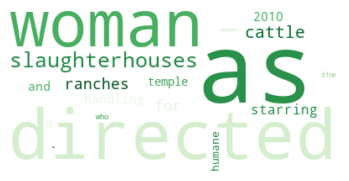

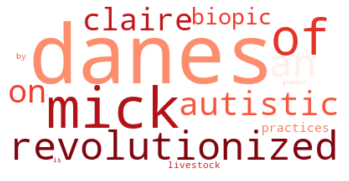

In [ ]:
# After running this function the output can be used to copy/paste into Feature attribution Prototypes in Figma
# Uncomment for example:
# tokens = ['temple', 'grandin', 'is', 'a', '2010', 'biopic', 'directed', 'by', 'mick', 'jackson', 'and', 'starring', 'claire', 'danes', 'as', 'temple', 'grandin', ',', 'an', 'autistic', 'woman', 'who', 'revolutionized', 'practices', 'for', 'the', 'humane', 'handling', 'of', 'livestock', 'on', 'cattle', 'ranches', 'and', 'slaughterhouses', '.']
# norm_lime = np.array([0.04704264, -0.080685325, -0.025374213, 0.08016668, 0.0696485, -0.10760934, 0.2548712, -0.0384657, -0.20225246, 0.0024760447, 0.09095571, 0.08298841, -0.10954817, -0.5611636, 0.46188897, 0.052781705, -0.014329923, 0.04604093, -0.14814752, -0.1256353, 0.22176166, 0.020393867, -0.1489739, -0.10306552, 0.10873335, 0.022720896, 0.04825359, 0.067170285, -0.15492998, -0.043140918, -0.119319454, 0.13016959, 0.10533826, 0.07264544, 0.21553318, 0.06521242])

displayHeatMap(tokens, norm_lime)
displayWordCloud(tokens, norm_lime)
